## Classification algorithms on MNIST dataset

### Import Libraries and Dataset

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [3]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the dataset: Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0


### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

# Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



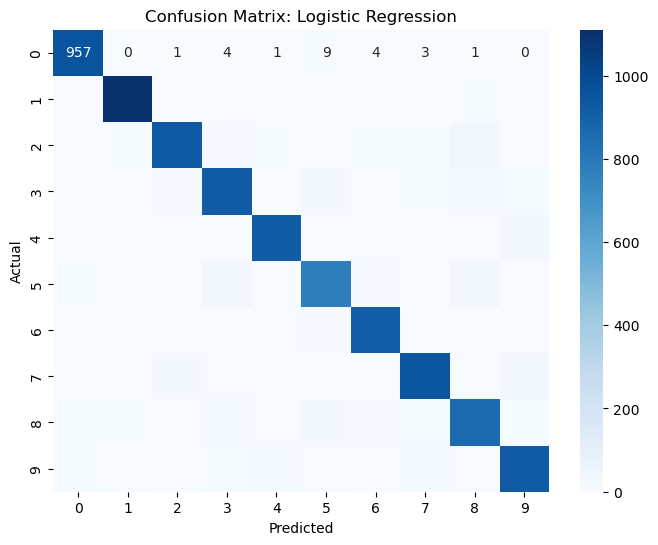

In [20]:
# Confusion Matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.1}


K-Nearest Neighbors Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



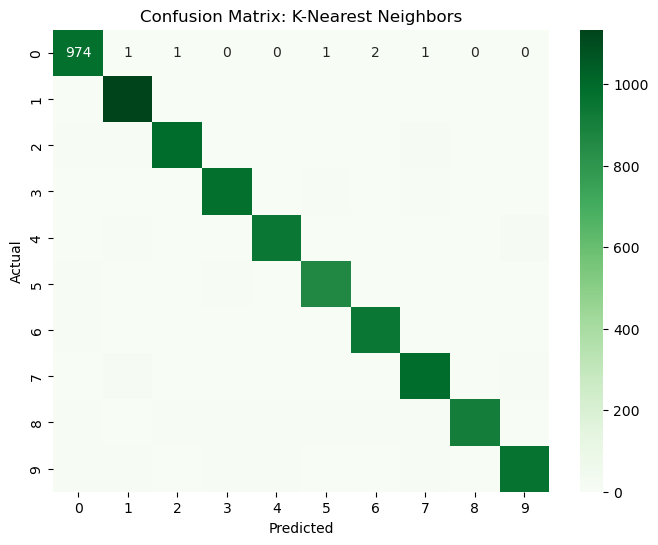

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("K-Nearest Neighbors Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix: K-Nearest Neighbors")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Decision Tree Classifier

In [28]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate performance
print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy:  0.8779
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.95      0.96      0.96      1135
           2       0.87      0.85      0.86      1032
           3       0.83      0.86      0.84      1010
           4       0.88      0.88      0.88       982
           5       0.84      0.84      0.84       892
           6       0.90      0.89      0.89       958
           7       0.91      0.90      0.90      1028
           8       0.82      0.80      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



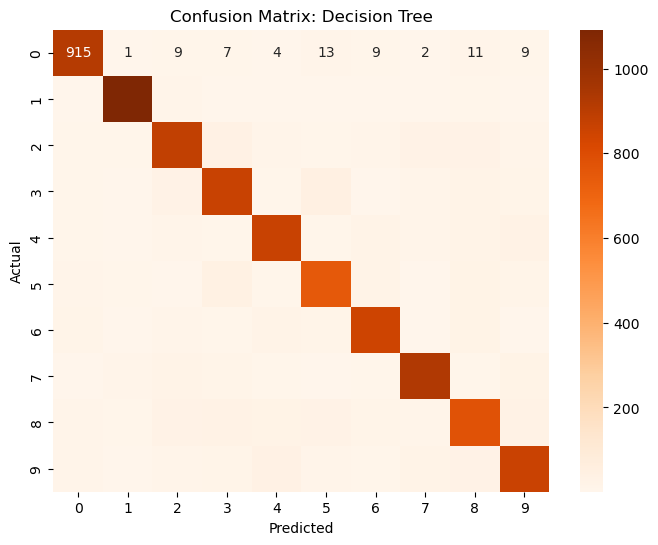

In [33]:
# Confusion Matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix: Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_model.predict(X_test)

# Evaluation
print("Random Forest Report:")
print(classification_report(y_test, y_pred_forest))



Random Forest Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



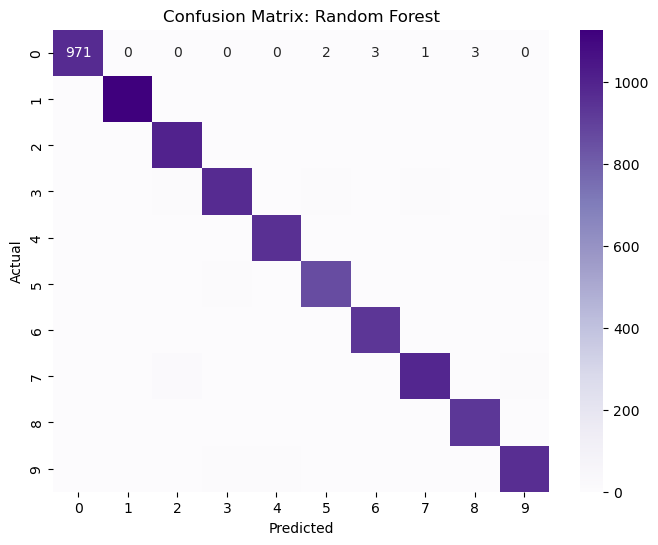

In [51]:
# Confusion Matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_forest, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Support Vector Machine (SVM)

In [15]:
from sklearn.svm import SVC

# Train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("Support Vector Machine Report:")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



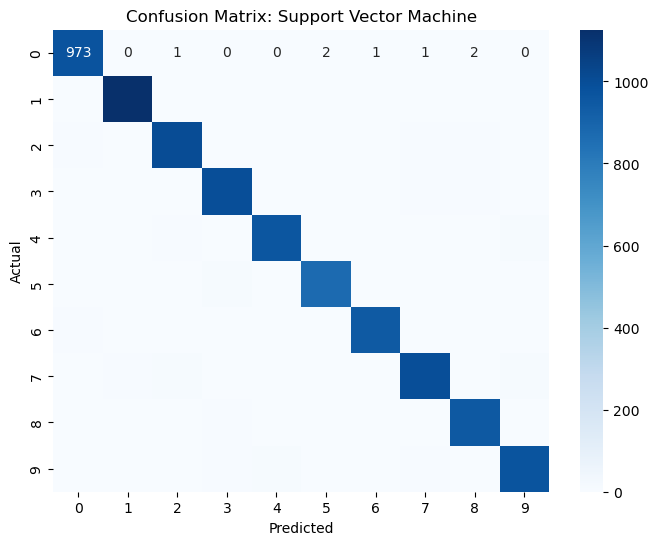

In [17]:
# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Support Vector Machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Neural Network

In [11]:
from sklearn.neural_network import MLPClassifier

# Train the Neural Network model
mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluation
print("Neural Network Report:")
print(classification_report(y_test, y_pred_mlp))



Neural Network Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



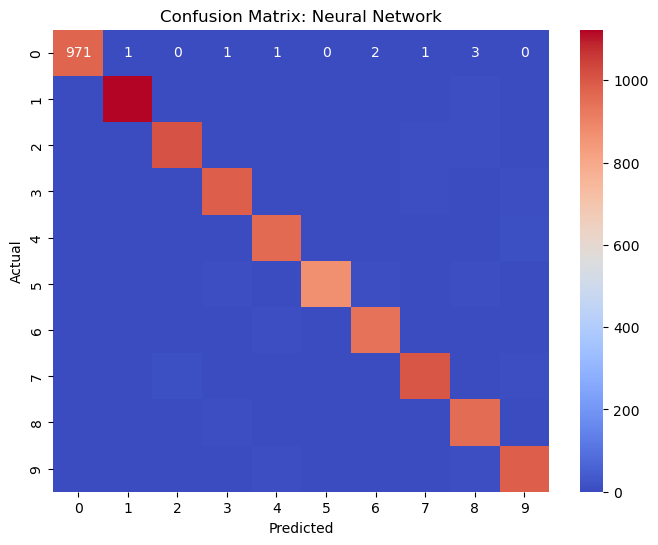

In [13]:
# Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix: Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Observations
##### Logistic Regression

Strengths: Simplicity, fast training, good baseline performance.

Weaknesses: Limited representational power for complex patterns (e.g., digits 5 and 8 are frequently misclassified).

##### K-Nearest Neighbors

Strengths: Non-parametric, handles non-linear data well.

Weaknesses: Computationally expensive for large datasets (due to distance calculations).

Misclassifications: Often confused neighboring digits, e.g., 3 and 5.

##### Support Vector Machine (SVM)

Strengths: Effective in high-dimensional spaces and for smaller datasets.

Weaknesses: Training time scales poorly with large datasets.

Performance: Misclassifications are minimal; handles complex digit patterns better than logistic regression.

##### Random Forest

Strengths: Handles overfitting better and is robust to noise.

Weaknesses: Slightly slower training than logistic regression or KNN.

Performance: Balances accuracy and computational efficiency well.

##### Neural Network (MLP)

Strengths: Captures complex non-linear patterns, highest accuracy on MNIST.

Weaknesses: Requires more computational resources and hyperparameter tuning.

Performance: Almost perfect diagonal in confusion matrix, with minimal misclassifications.


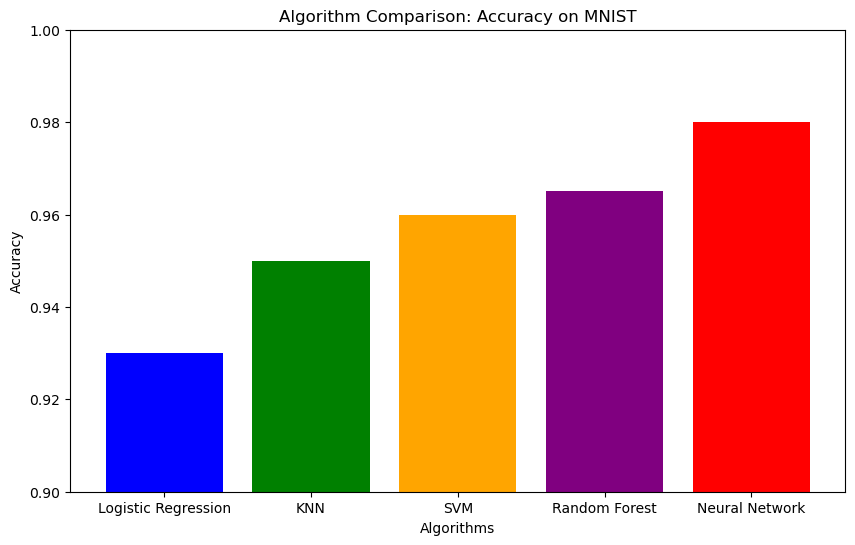

In [47]:
import matplotlib.pyplot as plt

# Example accuracies for each algorithm
algorithms = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'Neural Network']
accuracies = [0.93, 0.95, 0.96, 0.965, 0.98]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'orange', 'purple', 'red'])
plt.title('Algorithm Comparison: Accuracy on MNIST')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show()
